In [4]:
from ILC_helpers import *

band = ['K', 'Ka', 'Q', 'V', 'W']
band_beam = ['K1', 'ka1', 'Q1', 'Q2', 'V1', 'V2', 'W1', 'W2', 'W3', 'W4']
Nside = 512
lmax = 750

# Read

In [ ]:
# Read 9 year imap of WMAP
maps = read_map(band)
# Map change to alm [Default: healpy.map2alm change NESTED to RING]
alms = map2alm(maps, lmax)
# Read beam_transfer_function and average each beam_transfer_function bands. Examples, Q_average = (Q1+Q2)/2 and so on. 
beam_transfer_functions = read_band_beam(band_beam, lmax)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


# Do ILC

In [618]:
ilc = ILC(alms, beam_transfer_functions, lmax)
#Calculate Cl >> Cl = <|alm|^2>
Cl = ilc.Cl_cal()
#Calculate weight using Cl >> w = Cl^(-1)*e/[e.T*Cl^(-1)*e]
weights = ilc.weight_cal(Cl)
#Do ILC >> alm_clean = Σ[i=1~5]w*alm/Bl 
alm_clean = ilc.Do_ILC(weights)
#alm_clean change to map_clean
map_clean = alm2map(alm_clean, Nside, fwhm = 1.0)

Sigma is 25.479654 arcmin (0.007412 rad) 
-> fwhm is 60.000000 arcmin


# Result

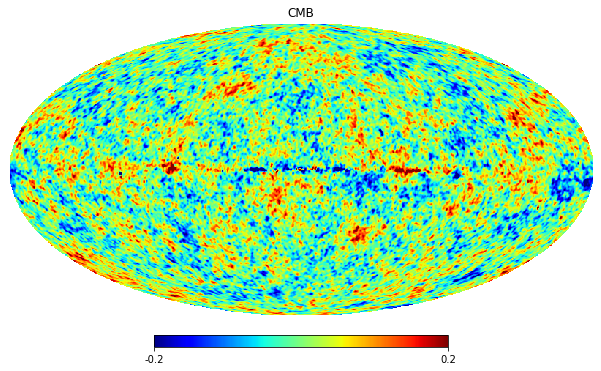

In [619]:
# See the result of clean CMB map 
hp.mollview(map_clean, title = 'CMB', cmap = 'jet', max = 0.2, min = -0.2)

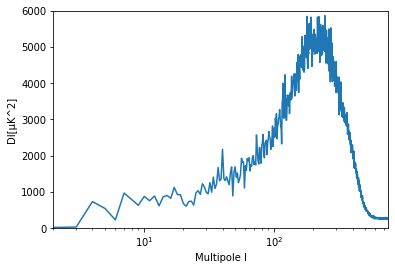

In [620]:
# See the result Dl = l(l+1)Cl/2π[μK^2]
Dl(alm_clean, lmax)